In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data preprocessing

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## 1) Load data

In [58]:
punching_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/punching_sliding.csv'

In [59]:
smoking_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/smoking_sliding.csv'

In [60]:
df_punching = pd.read_csv(punching_path)

df_punching

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,290.693,161.699,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,290.661,158.996,298.499,160.267,0.000,0.000,317.984,164.255,2
1,290.692,161.703,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,290.662,159.004,298.495,160.273,0.000,0.000,317.984,164.251,2
2,291.954,161.696,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,290.669,158.995,298.510,160.266,0.000,0.000,317.990,164.251,2
3,290.694,161.694,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,290.658,158.992,298.504,160.261,0.000,0.000,316.802,164.252,2
4,290.694,161.683,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,290.667,158.981,298.509,160.255,0.000,0.000,317.985,164.270,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190075,367.578,109.469,349.299,142.116,327.101,142.101,299.802,182.473,320.646,202.043,371.461,144.664,368.914,185.100,379.303,211.155,333.664,233.278,328.493,297.212,324.540,362.379,364.977,233.305,358.380,297.139,349.344,353.245,359.727,106.869,368.857,104.290,345.406,109.511,0.000,0.000,2
190076,379.255,112.106,349.331,140.824,331.071,142.121,306.313,186.382,331.084,204.638,368.840,140.768,361.097,183.817,377.980,204.636,336.285,232.002,328.533,297.158,323.255,362.376,362.359,230.699,357.129,295.863,349.313,351.960,371.494,108.198,379.248,108.158,355.837,109.469,0.000,0.000,2
190077,379.292,109.562,349.351,140.847,331.095,142.109,306.357,183.829,331.106,204.647,368.845,140.826,362.356,185.104,379.339,203.359,337.534,232.019,328.510,297.172,323.260,362.370,362.368,231.982,357.120,295.847,349.318,351.937,371.516,108.108,379.248,106.858,357.107,109.438,0.000,0.000,2
190078,379.257,110.819,349.347,140.830,331.103,142.100,306.338,183.821,333.668,205.941,368.846,140.796,362.386,185.080,379.257,203.365,336.295,231.996,328.500,297.186,321.976,362.376,362.363,230.700,357.115,295.856,349.320,351.949,371.485,108.133,379.248,108.142,354.542,108.249,0.000,0.000,2


In [61]:
df_smoking = pd.read_csv(smoking_path)

df_smoking

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,333.770000,85.241778,324.893667,117.939111,305.293000,119.228000,295.470667,162.394222,297.418667,201.668889,341.613333,116.635111,351.406667,154.591556,349.486667,132.359556,309.233000,204.285778,303.348000,267.131556,302.326000,323.346222,333.786667,204.287556,332.769000,267.078667,326.903333,320.686222,330.772000,78.676444,337.650000,78.681778,951.296,180.159,0.0,0.0,1
1,333.790000,85.257778,324.900667,117.922667,306.279667,119.208000,295.499333,162.396889,297.438667,202.923111,341.596667,116.629778,352.383333,153.326222,349.453333,129.706667,309.247667,204.291111,304.301000,267.088000,302.311000,323.341333,333.783333,204.279111,332.776000,267.048444,327.850000,319.456000,330.793667,78.677333,338.630000,78.707111,954.022,180.145,0.0,0.0,1
2,334.726667,86.532000,324.929333,117.944444,307.238000,119.218222,295.492333,162.445333,297.437000,203.006222,342.553333,116.648000,356.276667,153.281333,349.423333,127.101333,309.245000,204.280444,304.305333,267.110667,302.328333,323.337333,333.783333,204.265333,332.779667,267.073778,327.848000,319.466667,331.762333,78.708889,339.593333,78.735111,954.154,180.149,0.0,0.0,1
3,334.750000,86.560000,325.887000,116.626667,308.246000,117.935111,296.467333,161.117333,296.472000,201.634222,344.516667,115.312889,356.326667,153.299111,349.396667,125.814222,309.236667,203.004889,304.324333,267.065333,302.322000,322.046222,334.706667,203.014222,332.779000,267.043111,327.851000,320.692000,331.787000,78.740889,339.616667,78.747556,954.270,183.041,0.0,0.0,1
4,335.693333,86.576000,325.897333,116.635556,309.174667,117.969778,296.454333,161.153778,296.440000,201.635556,344.510000,114.017778,357.293333,153.281778,348.490000,121.908000,309.245667,202.997778,306.263000,265.787556,302.312667,322.045333,334.703333,203.001333,332.793667,265.820000,326.898667,320.699556,332.704000,78.756000,340.543333,78.752889,957.030,183.052,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142843,317.030667,100.958222,293.535000,136.249778,276.820000,137.572000,264.108333,191.217333,271.933667,237.017778,310.225333,133.666667,318.025000,184.649778,319.009667,229.130222,286.633667,246.147556,281.736333,318.098222,287.613000,376.976444,312.138000,244.796889,318.076333,316.779111,332.758333,380.813333,311.199667,97.033333,0.000000,0.000000,898.137,221.349,0.0,0.0,1
142844,317.031667,100.956889,293.534667,136.265778,276.822000,137.563111,264.112000,191.209333,272.904000,238.278667,310.225333,134.955111,318.071000,184.688444,323.905000,231.756444,286.606667,246.161778,280.750667,318.070667,286.695333,376.977778,311.188667,244.828000,319.016333,316.786222,332.749000,380.824444,311.204333,97.030667,0.000000,0.000000,898.164,221.364,0.0,0.0,1
142845,317.032667,100.968444,293.522000,136.244444,276.818000,136.286222,265.065333,191.186222,272.920333,235.726222,310.211667,134.952000,319.983000,184.654222,325.898667,231.743556,286.631333,247.451111,281.743667,318.120889,287.628000,376.979556,311.196333,246.116444,319.008667,316.764000,332.760000,379.597333,311.208000,97.041333,0.000000,0.000000,898.194,221.375,0.0,0.0,1
142846,317.028333,100.972444,293.504333,136.263556,276.802333,136.272889,265.064333,189.907556,273.878667,234.408444,310.189333,136.264889,319.044667,184.659556,325.912333,227.850222,286.616000,246.160000,283.682000,318.092000,287.614333,376.968444,311.175667,244.818667,319.012333,316.744000,332.749333,380.816889,311.208333,97.035111,0.000000,0.000000,898.174,221.326,0.0,0.0,1


## 2) Check Null Value

In [62]:
df_punching.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
y     0
dtype: int64

In [63]:
df_smoking.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
y     0
dtype: int64

## 3) Concatenate Data

In [64]:
print(df_punching.shape)
print(df_smoking.shape)
print(df_punching.shape[0] + df_smoking.shape[0])

(190080, 37)
(142848, 37)
332928


In [102]:
df = pd.concat((df_punching, df_smoking), axis=0, ignore_index=True)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,290.693000,161.699000,307.602000,207.250000,285.384000,205.939000,275.033000,250.267000,265.938000,286.746000,331.090000,211.121000,337.569000,259.385000,327.208000,295.910000,286.718000,291.991000,291.966000,354.547000,289.371000,401.517000,318.035000,294.563000,328.432000,358.453000,337.620000,419.732000,290.661000,158.996000,298.499,160.267,0.000,0.000,317.984,164.255,2
1,290.692000,161.703000,307.593000,205.975000,284.154000,204.656000,275.023000,250.258000,265.927000,286.758000,331.096000,211.115000,337.552000,263.272000,325.892000,298.512000,285.515000,291.992000,291.964000,354.542000,289.346000,401.530000,318.033000,294.569000,328.429000,358.463000,337.624000,420.964000,290.662000,159.004000,298.495,160.273,0.000,0.000,317.984,164.251,2
2,291.954000,161.696000,307.587000,207.241000,284.136000,204.675000,275.016000,251.537000,265.938000,286.740000,331.109000,211.125000,337.554000,263.290000,325.854000,298.535000,285.498000,291.992000,291.975000,354.535000,289.367000,401.528000,318.019000,294.574000,328.420000,358.453000,337.624000,420.957000,290.669000,158.995000,298.510,160.266,0.000,0.000,317.990,164.251,2
3,290.694000,161.694000,307.602000,207.250000,284.168000,205.932000,275.020000,251.551000,265.923000,286.781000,331.107000,211.127000,337.545000,263.302000,325.848000,299.779000,285.515000,293.261000,291.966000,354.561000,289.356000,401.517000,318.030000,294.579000,328.419000,358.455000,337.629000,420.955000,290.658000,158.992000,298.504,160.261,0.000,0.000,316.802,164.252,2
4,290.694000,161.683000,307.600000,207.254000,284.173000,205.931000,275.016000,251.550000,265.919000,286.792000,331.101000,211.132000,337.561000,263.289000,325.891000,299.781000,286.713000,293.268000,291.954000,354.529000,289.358000,401.508000,318.028000,294.586000,328.429000,358.462000,337.632000,420.970000,290.667000,158.981000,298.509,160.255,0.000,0.000,317.985,164.270,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332923,317.030667,100.958222,293.535000,136.249778,276.820000,137.572000,264.108333,191.217333,271.933667,237.017778,310.225333,133.666667,318.025000,184.649778,319.009667,229.130222,286.633667,246.147556,281.736333,318.098222,287.613000,376.976444,312.138000,244.796889,318.076333,316.779111,332.758333,380.813333,311.199667,97.033333,0.000,0.000,898.137,221.349,0.000,0.000,1
332924,317.031667,100.956889,293.534667,136.265778,276.822000,137.563111,264.112000,191.209333,272.904000,238.278667,310.225333,134.955111,318.071000,184.688444,323.905000,231.756444,286.606667,246.161778,280.750667,318.070667,286.695333,376.977778,311.188667,244.828000,319.016333,316.786222,332.749000,380.824444,311.204333,97.030667,0.000,0.000,898.164,221.364,0.000,0.000,1
332925,317.032667,100.968444,293.522000,136.244444,276.818000,136.286222,265.065333,191.186222,272.920333,235.726222,310.211667,134.952000,319.983000,184.654222,325.898667,231.743556,286.631333,247.451111,281.743667,318.120889,287.628000,376.979556,311.196333,246.116444,319.008667,316.764000,332.760000,379.597333,311.208000,97.041333,0.000,0.000,898.194,221.375,0.000,0.000,1
332926,317.028333,100.972444,293.504333,136.263556,276.802333,136.272889,265.064333,189.907556,273.878667,234.408444,310.189333,136.264889,319.044667,184.659556,325.912333,227.850222,286.616000,246.160000,283.682000,318.092000,287.614333,376.968444,311.175667,244.818667,319.012333,316.744000,332.749333,380.816889,311.208333,97.035111,0.000,0.000,898.174,221.326,0.000,0.000,1


In [103]:
df.shape[0] / 32

10404.0

## 4) Make 'y'

In [128]:
def makeY(df, n_frame=32):
    y = df['y'].to_list()
    y = [y[i * n_frame:(i + 1) * n_frame] for i in range((len(y) + n_frame - 1) // n_frame )]
    y = [ys[0] for ys in y]

    encoder = LabelEncoder()    
    encoder.fit(y)
    classes = encoder.classes_
    y = encoder.transform(y)

    y = to_categorical(y)

    return y, classes

In [129]:
y, classes = makeY(df)

In [130]:
y.shape

(10404, 2)

In [131]:
classes

array([1, 2])

In [132]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## 5) Make 'X'

In [133]:
def makeX(df, n_frame=32):
    x_cat = df.iloc[:,:-1].values

    data = []
    for rows in x_cat:
        for element in rows:
            data.append(np.float32(element))

    x = np.array(data)
    x = x.reshape(-1, 32, 36)

    return x

In [122]:
X = makeX(df)

In [123]:
X.shape

(10404, 32, 36)

## 6) Data Split

In [134]:
random_seed = 0
n_frame = 32

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)

In [136]:
X_train.shape, y_train.shape

((7490, 32, 36), (7490, 2))

In [137]:
X_valid.shape, y_valid.shape

((1873, 32, 36), (1873, 2))

In [138]:
X_test.shape, y_test.shape

((1041, 32, 36), (1041, 2))

# 2. LSTM Modeling

In [147]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

import keras.backend as K

In [148]:
n_input = 36 # 한 사람의 동작 좌표(x,y) 2 x 18
n_steps = 32 # per frames

n_hidden = 32
n_classes = len(y[0])

epochs = 100
batch_size = 128

## 1) Model define

In [149]:
K.clear_session()

model = Sequential()
model.add(Dense(n_hidden, activation='relu', input_shape=(n_steps, n_input)))
model.add(LSTM(n_hidden))
# model.add(LSTM(n_hidden))

# model.add(Dense(n_classes, activation = 'softmax'))
model.add(Dense(n_classes, activation = 'sigmoid'))

In [150]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32)            1184      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 9,570
Trainable params: 9,570
Non-trainable params: 0
_________________________________________________________________


## 2) Model Compile

In [151]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

## 3) Model Fit

In [152]:
%%time
hist = model.fit(X_train, y_train,
                 epochs = epochs,
                 batch_size = batch_size,
                 validation_data = (X_valid, y_valid))

Epoch 1/100
59/59 [==============================] - 18s 14ms/step - loss: 0.5514 - accuracy: 0.6822 - val_loss: 0.3781 - val_accuracy: 0.8820
Epoch 2/100
59/59 [==============================] - 0s 6ms/step - loss: 0.3438 - accuracy: 0.9359 - val_loss: 0.2680 - val_accuracy: 0.9925
Epoch 3/100
59/59 [==============================] - 0s 7ms/step - loss: 0.2456 - accuracy: 0.9976 - val_loss: 0.1947 - val_accuracy: 0.9984
Epoch 4/100
59/59 [==============================] - 0s 7ms/step - loss: 0.1740 - accuracy: 0.9979 - val_loss: 0.1464 - val_accuracy: 1.0000
Epoch 5/100
59/59 [==============================] - 0s 6ms/step - loss: 0.1282 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 1.0000
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 1.0000
Epoch 7/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0812 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 8/100

## 4) Visualization(Loss, Accuracy)

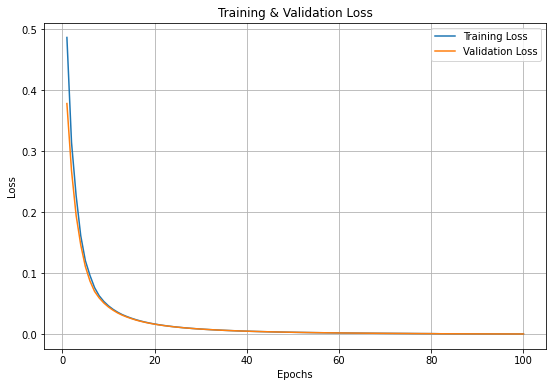

In [153]:
epochs = range(1, len(hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

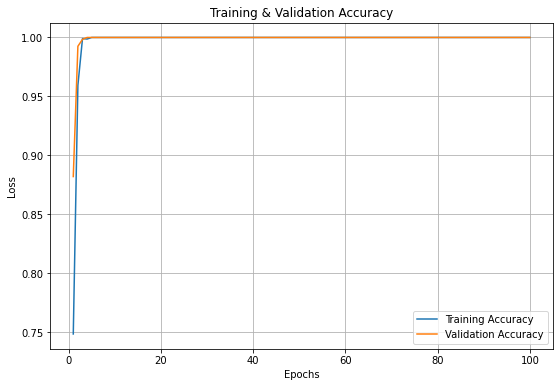

In [154]:
epochs = range(1, len(hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist.history['accuracy'])
plt.plot(epochs, hist.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

## 5) Model Evaluate 

In [155]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

9/9 [==============================] - 0s 4ms/step - loss: 4.6547e-04 - accuracy: 1.0000
Loss = 0.00047
Accuracy = 1.00000


## 6) Model Save

In [158]:
abs_path = '/content/drive/MyDrive/Project/Project_Gotcha/models/'
model_name = 'lstm_p1_punching_smoking.h5'
final_path = abs_path + model_name

In [159]:
model.save(final_path)

# 3. Model Predict

## 1) Load Data

In [174]:
test_path = '/content/drive/MyDrive/Project/Project_Gotcha/ipynb/datasets/real_test.csv'

assault = pd.read_csv(test_path)
assault

,index,p_1,p_2
0,flip000000000008,"131.09,158.404,104.906,183.22,110.116,183.185,...","248.509,153.248,269.347,187.123,266.713,183.23..."
1,flip000000000009,"131.075,153.246,104.93,183.228,110.141,183.186...","251.095,154.528,270.695,187.155,266.793,183.27..."
2,flip000000000010,"131.052,153.234,107.52,183.257,115.369,183.25,...","252.397,155.805,271.984,187.136,266.782,183.28..."
3,flip000000000011,"137.531,153.186,110.139,183.29,120.575,184.531...","256.34,158.436,275.894,191.015,266.792,184.539..."
4,flip000000000012,"140.158,153.219,111.47,183.291,121.878,184.541...","260.209,159.702,277.204,191.078,268.082,185.83..."
5,flip000000000013,"141.517,153.2,114.042,184.541,125.776,185.819,...","265.428,159.734,279.828,192.304,271.97,185.861..."
6,flip000000000014,"150.535,153.197,120.573,185.866,128.411,189.74...","274.558,159.74,286.38,191.06,275.886,184.516,2..."
7,flip000000000015,"275.944,160.96,288.968,191.042,277.231,183.271...","151.901,154.499,124.515,187.143,129.663,191.02..."
8,flip000000000016,"278.479,159.724,292.869,189.744,279.816,183.26...","154.49,153.199,129.76,188.463,128.428,192.307,..."
9,flip000000000017,"285.043,159.676,298.049,189.758,287.599,184.51...","161.007,151.926,133.619,187.127,123.211,192.34..."


In [186]:
def testMakeX(df, name, n_frame=32):
    xs = df[name].to_list()

    data = []
    for rows in xs:
        elements = str(rows).split(',')
        for element in elements:
            data.append(float(element))

    x = np.array(data)
    x = x.reshape(-1, 32, 36)

    return x

In [187]:
X_pre = testMakeX(assault, 'p_2')

X_pre.shape

(1, 32, 36)

## 2) Load Model

In [197]:
from keras.models import load_model

np.set_printoptions(precision=6, suppress=True) # np.array 표현 방식 변경 (지수 -> 실수)

In [198]:
loaded_model = load_model(final_path)

In [199]:
predict_dict = {}

predictions = loaded_model.predict(X_pre)

for idx, c in enumerate(classes):
    predict_dict[c] = predictions[0][idx]

print(predict_dict)

{1: 0.0001358774, 2: 0.99973243}


In [200]:
predict_class = np.argmax(predictions[0], axis=-1)

classes[predict_class]

2